<a href="https://colab.research.google.com/github/jiiinchoi/machine-learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/customer_pca.csv'
customer = pd.read_csv(file_url)

In [2]:
customer.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


In [3]:
customer_X = customer.drop('label', axis = 1)
customer_y = customer['label']

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2) # 변수를 2개만 만들겠다 -> 2차원으로 축소하겠

In [6]:
pca.fit(customer_X)
customer_pca = pca.transform(customer_X)

In [7]:
customer_pca

array([[-3.92906072e+00,  1.02604491e-01],
       [ 3.10758276e+00, -1.74887930e+00],
       [ 3.02379272e+00,  3.21221215e+00],
       [-4.28241767e+00,  1.13781030e-02],
       [ 2.59065802e+00, -1.90612064e+00],
       [ 8.70343520e-01, -1.79154348e-02],
       [-1.16508938e+00,  2.00387900e+00],
       [ 1.41163657e+00, -1.21220170e+00],
       [ 1.79302072e-01, -1.15337545e+00],
       [-2.74166293e+00, -3.48112299e-02],
       [ 4.03108363e-01, -2.56426911e-01],
       [-4.32816586e+00,  1.09280479e-01],
       [-1.06779010e+00, -4.71336448e-01],
       [-3.54208654e+00,  2.09373453e-01],
       [ 3.00321739e+00,  6.85140300e-02],
       [ 5.08464052e+00, -1.92234923e+00],
       [-1.39044460e+00,  3.22162225e-01],
       [-2.64318989e+00, -4.59744830e-01],
       [-7.37714393e-01, -9.30393910e-01],
       [-3.93420145e+00,  1.62749639e-01],
       [ 3.16675507e-01, -4.22288613e-01],
       [ 7.31864853e+00,  5.17885391e-02],
       [ 6.60448573e-01, -1.13828656e+00],
       [-3.

In [8]:
customer_pca = pd.DataFrame(customer_pca, columns = ['PC1','PC2'])

In [9]:
customer_pca = customer_pca.join(customer_y)

In [10]:
customer_pca.head()

,PC1,PC2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


<Axes: xlabel='PC1', ylabel='PC2'>

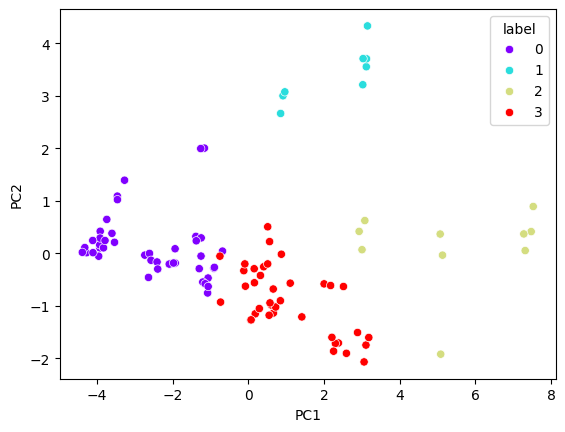

In [11]:
sns.scatterplot(x='PC1',y='PC2', data = customer_pca, hue = 'label', palette='rainbow')

In [12]:
customer.groupby('label').mean()


,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
label,,,,,,,,,,,,
0,-0.873254,-0.744448,-0.761970,-0.623528,-0.663638,-0.860472,-0.841604,-0.885780,-0.708370,-0.772974,-0.696862,-0.283198
1,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970
2,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740
3,0.298361,0.131385,0.191374,1.008766,0.100261,0.444575,0.348234,0.697537,0.358052,0.452568,0.000605,-0.245254


In [13]:
pca.components_

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [14]:
df_comp = pd.DataFrame(pca.components_,columns=customer_X.columns)

<Axes: >

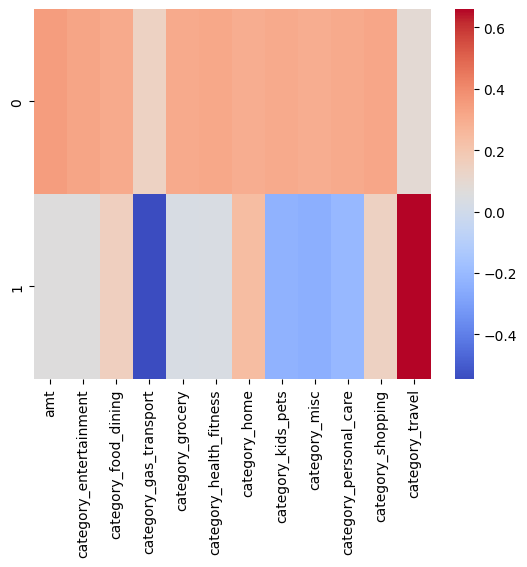

In [15]:
sns.heatmap(df_comp,cmap='coolwarm')

In [16]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv'
anonymous = pd.read_csv(file_url)

In [17]:
anonymous.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


In [18]:
anonymous['class'].mean()# 평균확인

np.float64(0.25)

In [19]:
anonymous.isna().sum().sum() #결측치 확인

np.int64(0)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(anonymous.drop('class', axis=1), anonymous['class'], test_size=0.2, random_state=100)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(random_state=100)

In [23]:
import time
start_time = time.time()
model_1.fit(X_train_scaled, y_train)
print(time.time() - start_time)

169.3114070892334


In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred_1 = model_1.predict(X_test_scaled)
accuracy_score(y_test, pred_1)

0.958

In [25]:
proba_1 = model_1.predict_proba(X_test_scaled)
roc_auc_score(y_test, proba_1[:,1])

np.float64(0.9982541957107813)

In [26]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)

PCA(n_components=2)

In [27]:
pca.explained_variance_ratio_

array([0.04992445, 0.03331408])

In [28]:
var_ratio = []

In [29]:
for i in range(100,550, 50):
    pca = PCA(n_components=i)
    pca.fit_transform(X_train_scaled)
    ratio = pca.explained_variance_ratio_.sum()
    var_ratio.append(ratio)

<Axes: >

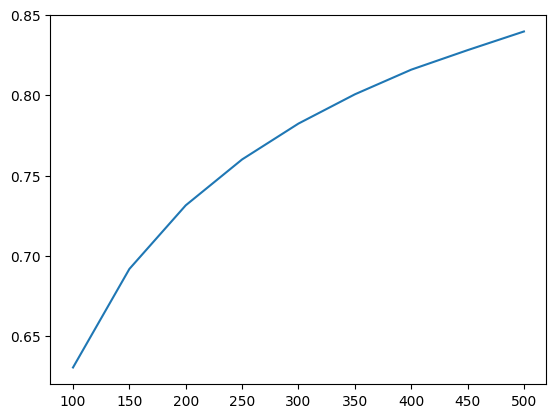

In [30]:
sns.lineplot(x=range(100,550,50), y=var_ratio)

In [31]:
pca = PCA(n_components=400, random_state = 100)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [32]:
model_2 = RandomForestClassifier(random_state=100)
start_time = time.time()
model_2.fit(X_train_scaled_pca, y_train)
print(time.time() - start_time)

96.88980078697205


In [33]:
pred_2 = model_2.predict(X_test_scaled_pca)
accuracy_score(y_test, pred_2)

0.988

In [34]:
proba_2 = model_2.predict_proba(X_test_scaled_pca)
roc_auc_score(y_test, proba_2[:,1])

np.float64(0.9981921809600143)